# Patterns to build class diagram and Skeleton Code Application using (DIP & OCP)



## Games
### 1. Tic-Tac-Toe (implemented)
### 2. Backgammon (skeleton)
### 3. Chess (skeleton)



## Algorithms
### 1. Minimax Algorithm (implemented)
### 2. Reinforment learning (skeleton)

# Based on Design Patterns: Elements of Reusable Object-Oriented Software (1995) 'The Gang of Four (GoF)'

### Creational, Structural and Behavioral

## Creational Patterns
Creational patterns emphasize the automatic creation of objects within code, rather than requiring you to instantiate objects directly. In most cases, this means that a function or method can call the code necessary to instantiate new objects on your behalf, so you only need to explicitly modify that object creation when it is necessary, and allow default behaviors to take over otherwise.
#### -Abstract Factory, Factory, Singleton



## Structural Patterns
Structural patterns focus on the composition of classes and objects. By using inheritance and interfaces, these patterns allow objects to be composed in a manner that provides new functionality. In most cases, an interface in object-oriented programming is an abstract type or class which has no logical code, but instead is used to define method signatures and behaviors for other classes that will implement the interface.
#### -Facade, Proxy, Composite, Decorator, Bridge, Flyweight

## Behavioral Patterns
#### Behavioral patterns are concerned with communication and assignment between objects.

### -Iterator, Mediator, Interpreter, Command, state, strategy, Template, Visitor,

# References
### Create Open-Closed Principles (OCP) and Dependency Inversion Principles (DIP)
 ##### - https://docs.python.org/3/library/abc.html
 ##### - https://towardsdatascience.com/how-to-use-abstract-classes-in-python-d4d2ddc02e90
 ##### - Module 1 & 2
 ##### - Frances Banks Design Patterns, Software Design Patterns Guide


italicized text##Dependency Inversion Principles (DIP)
#####*‘A dependency exists when a change in some element of software may cause changes in another element of software’ [1].*

-       Reduce dependencies & make them explicit & identify each.
-       The program is dependent on abstract classes not on concrete classes.
-       High level modules not dependent on low level modules, additionally details only in low level modules depend on the abstraction.
-       Your dependencies point upwards (abstraction)


##Open-Closed Principle (OCP)
-       Classes open for extension but closed for modifiable.
-        ‘hinge points in a design’ [1], OCD with LSP = DIP.
-       ‘…we want to be able to change what the modules do, without changing the source code of the modules’ [2].

##Liskov Substitution Principle (LSP)
* Related classes conforming to each other, if:
1. Sub-typing but no code extension (abstract class/ interfaces)
2. Code extension but no sub-typing (composition) polymorphism
-      Avoiding private variables/ operations in parent/ Super-Type class
-      Avoiding implementing new variables/ operations in child class/ Sub-Type
-      Over-ridden methods in child/ Sub-Type class accept the same input/ output values as parent/ Super-Type class.


# UML Design
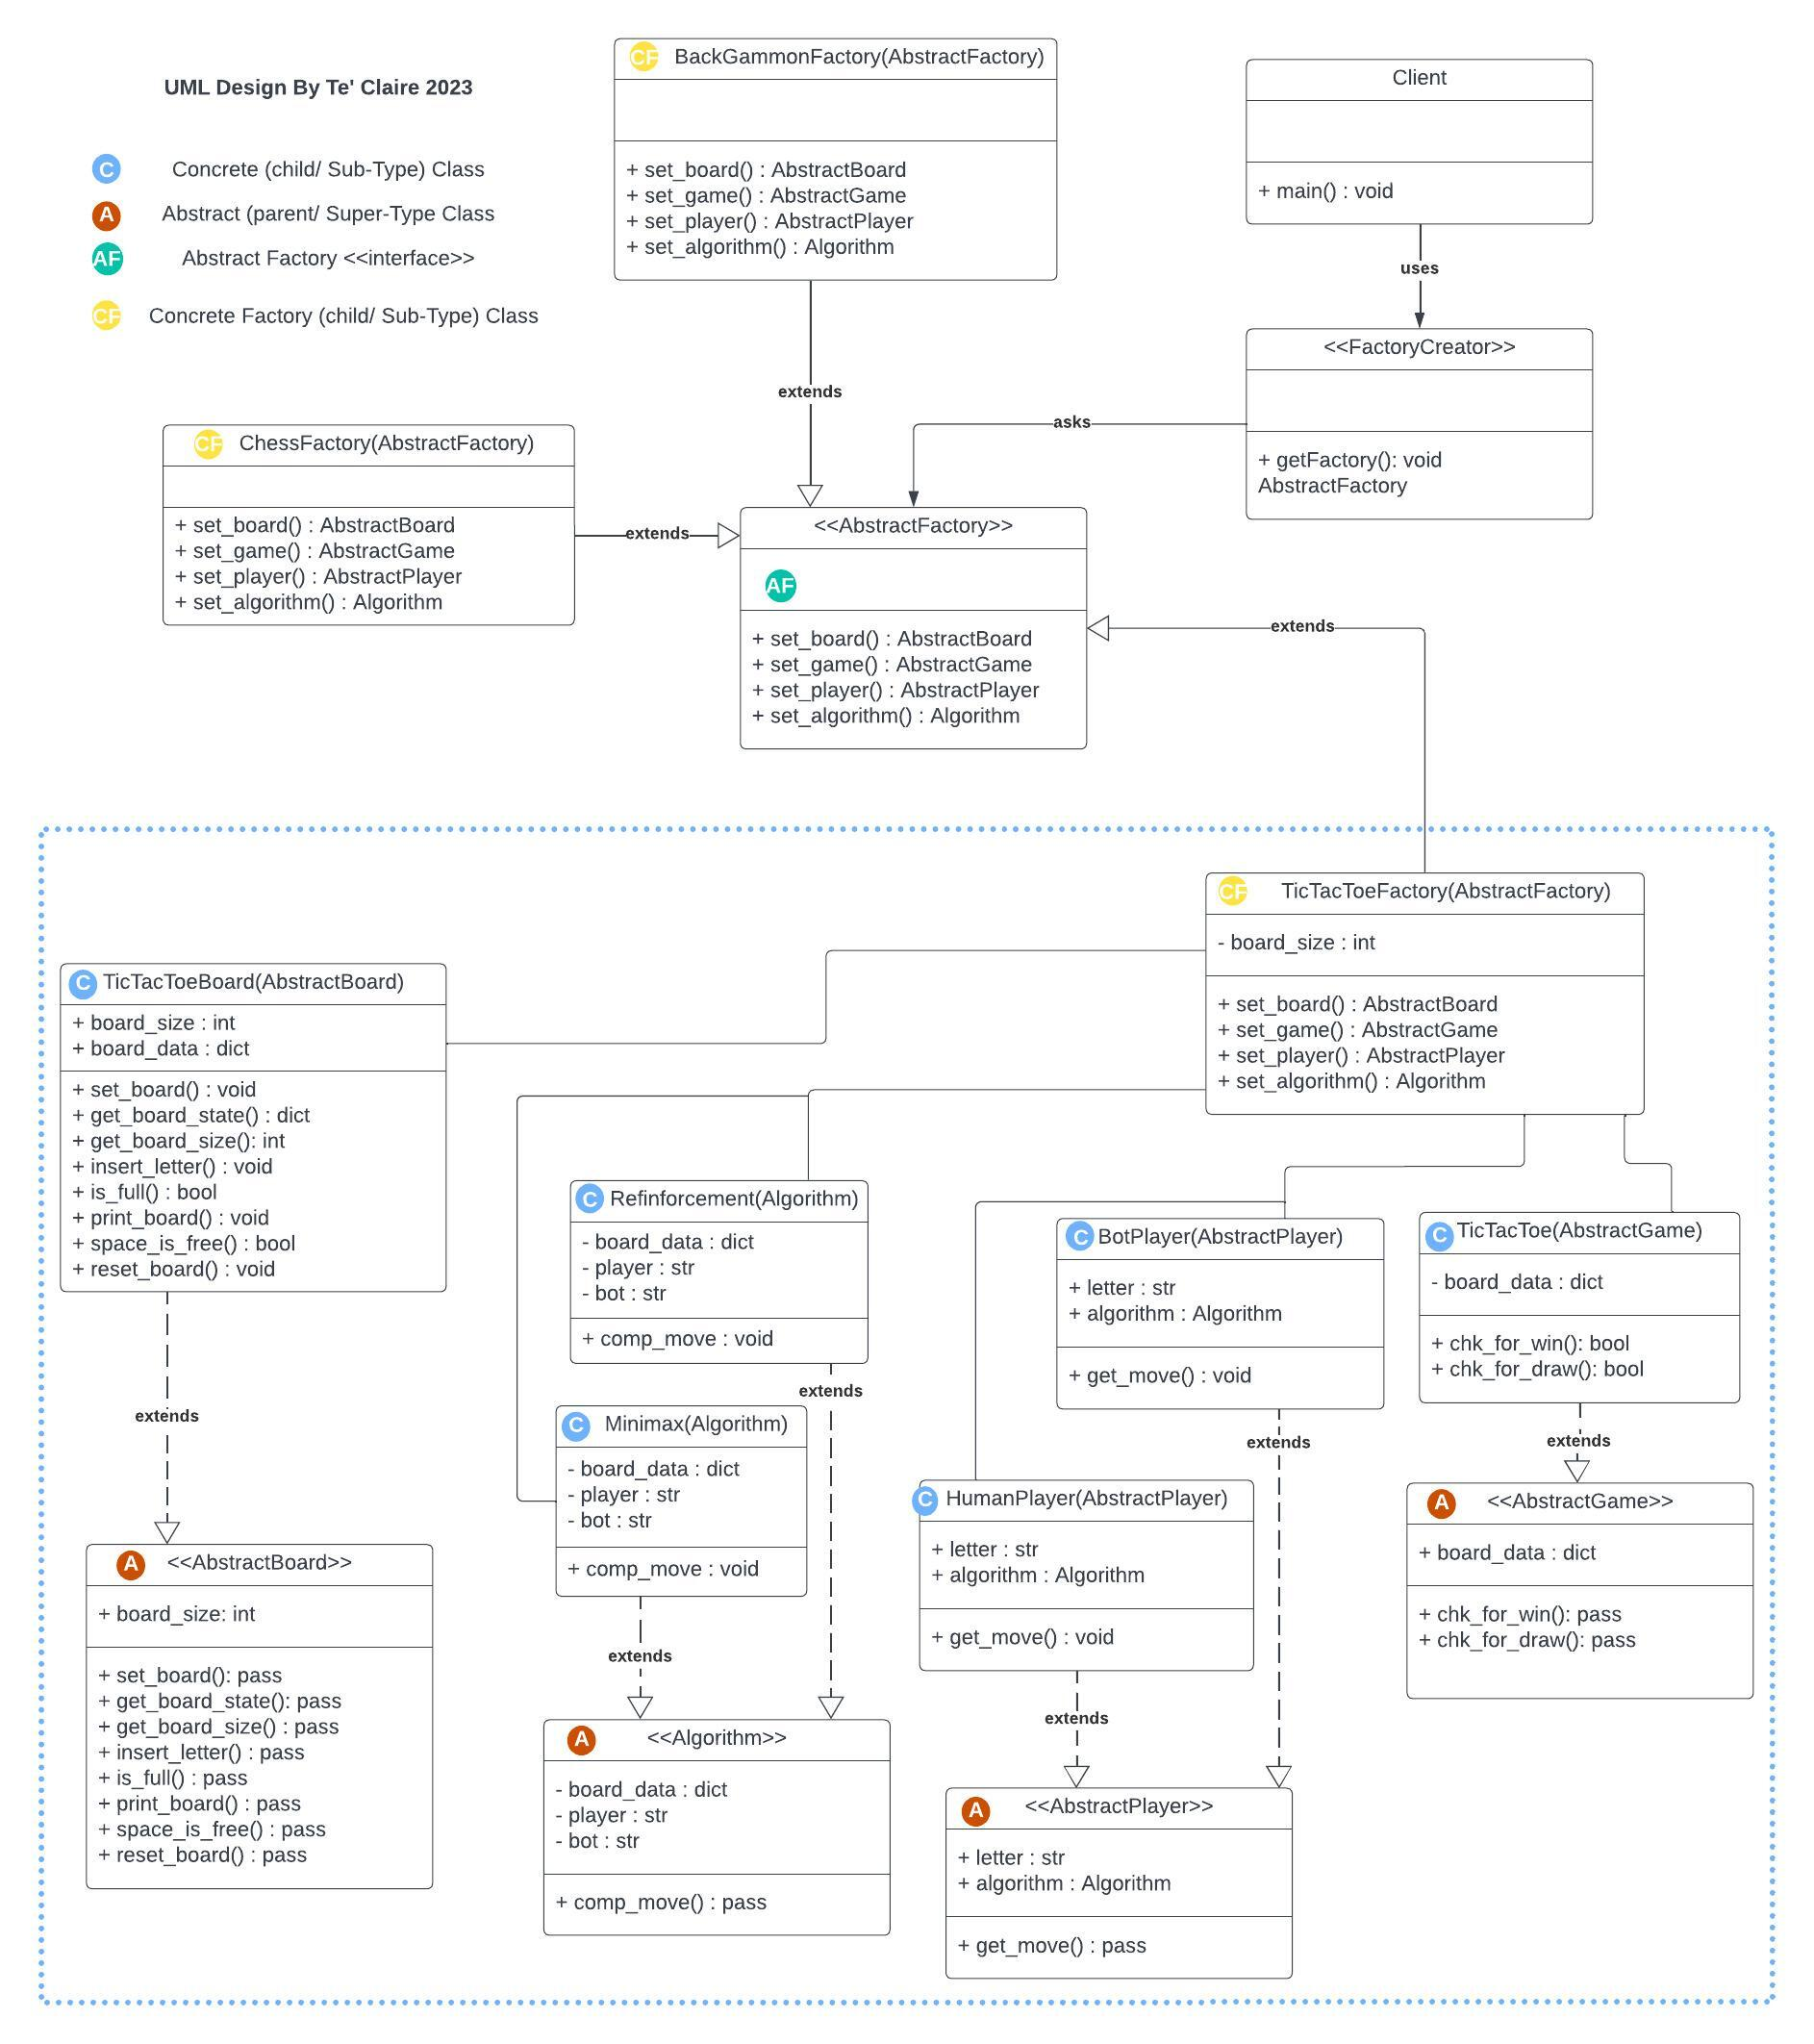


##Abstract Board Definition
#### Parent/ Super-Type Class

In [ ]:
#define the abstract board
# library for module abstract class
from abc import ABC, abstractmethod

class AbstractBoard(ABC):
    def __init__(self, board_size): #initialize the object's attributes
        self.board_size = board_size #defines the size

    @abstractmethod
    def set_board(self, placement, state):
        pass

    @abstractmethod
    def get_board_state(self):
        pass

    @abstractmethod
    def get_board_size(self):
        return self.board_size

    @abstractmethod
    def insert_letter(self, letter, position):
        pass

    @abstractmethod
    def is_full(self):
        pass

    @abstractmethod
    def print_board(self):
        pass

    @abstractmethod
    def space_is_free(self):
        pass

    @abstractmethod
    def reset_board(self):
        pass

## Concrete Board Definition
#### Child/ Sub-Type Class
#### Define the method to make it concrete

In [ ]:
# Concrete class for board
class Board(AbstractBoard):
    def __init__(self, board_size):
        self.board_size = board_size
        self.board_data = {i: ' ' for i in range(1, board_size * board_size + 1)}

    def set_board(self, placement, state):
        self.board_data[placement] = state

    def get_board_state(self):
        return self.board_data #dictionary

    def get_board_size(self):
        return self.board_size

    def insert_letter(self, letter, position):
        self.board_data[position] = letter

    def is_full(self):
        return all(val != ' ' for val in self.board_data.values())

    def print_board(self):
        for row in range(self.board_size):
            for col in range(self.board_size):
                position = row * self.board_size + col + 1
                print(self.board_data[position], end='')
                if col < self.board_size - 1:
                    print('|', end='')
            print()
            if row < self.board_size - 1:
                print('-' * (self.board_size * 2 - 1))

    def space_is_free(self, position):
        return self.board_data[position] == ' '

    def reset_board(self):
        self.board_data = {i: ' ' for i in range(1, self.board_size * self.board_size + 1)}


##Abstract Game Definition
#### Parent/ Super-Type Class

In [ ]:
class AbstractGame():
  def __init__(self, board_data):
    self.board_data = board_data #defines the board

    @abstractmethod
    def chk_for_win(self):
        pass

    @abstractmethod
    def chk_for_draw(self):
        pass

## 1. Concrete Game Definition Tic Tac Toe
#### Child/ Sub-Type Class

In [ ]:
class TicTacToeGame(AbstractGame):
  def __init__(self, board_data):
    #get access to method of parent/ super type class (board) returning a temp object
    super().__init__(board_data)

  # Check for Win
  def chk_for_win(self, letter): #Check for Win
    board_state = self.board_data.get_board_state()
    size = self.board_data.get_board_size()
    for row in range(size): # Check rows
        if all(board_state[row * size + col + 1] == letter for col in range(size)):
            return True

    for col in range(size): # Check columns
        if all(board_state[row * size + col + 1] == letter for row in range(size)):
            return True

    if all(board_state[i * size + i + 1] == letter for i in range(size)): # Check diagonals
        return True

    if all(board_state[i * size + size - i] == letter for i in range(size)):
        return True
    return False

  # Check for Draw
  def chk_for_draw(self):
    board_state = self.board_data.get_board_state()
    for key, value in board_state.items(): #calling tuple unpack to access keys/ values
        if value == ' ':
            return False
    return True

## 2. Concrete Game Definition Chess - (skeleton)
#### Child/ Sub-Type Class

In [ ]:
class Chess(AbstractGame):
  def __init__(self, board_data):
    super().__init__(board_data)

  def chk_for_win(self, letter):
    pass

  def chk_for_draw(self):
    pass


## 3. Concrete Game Definition BackGammon - (skeleton)
#### Child/ Sub-Type Class

In [ ]:
class BackGammonGame(AbstractGame):
  def __init__(self, board_data):
    super().__init__(board_data)

  def chk_for_win(self, letter):
    pass

  def chk_for_draw(self):
    pass


##Abstract Player Definition
#### Parent/ Super-Type Class
#### All details (functions) are in lower module (OCP)

In [ ]:
class AbstractPlayer(ABC):
    def __init__(self, letter, algorithm):
        self.letter = letter #O for human, X for bot
        self.algorithm = algorithm # subclass of abstract algorithm

    @abstractmethod
    def get_move(self, board):
        pass

## 1. Concrete Player Definition (human)
#### Child/ Sub-Type Class

In [ ]:
# Algorithm is passed but not set yet
class HumanPlayer(AbstractPlayer):
  def __init__(self, letter, algorithm):
    super().__init__(letter, algorithm)

  def get_move(self, board):
      while True:
          try:
              position = int(input(f'Enter position for {self.letter}: '))
              if 1 <= position <= len(board):
                  if board[position] == ' ':
                      return position
                  else:
                      print('Position taken, please pick a different position.')
              else:
                  print(f'Invalid input. Please enter a number between 1 and {len(board)}.')
          except ValueError:
              print('Invalid input. Please enter a valid integer.')


## 2. Concrete Player Definition (bot)
#### Child/ Sub-Type Class

In [ ]:
class BotPlayer(AbstractPlayer):
    def __init__(self, letter, algorithm):
        super().__init__(letter, algorithm)
        self.algorithm = algorithm

    def get_move(self, board):
        print("Bot moves")
        placement = self.algorithm.comp_move(board, self.letter) #get bot move
        board.set_board(placement, self.letter) #place bot

##Abstract Algorithm Definition
#### Parent/ Super-Type Class

In [ ]:
class Algorithm(ABC):
  def __init__(self, board_data):
    self.board_data = board_data
    self.player = '0'
    self.bot = 'X'

    @abstractmethod
    def comp_move(self, board_data, letter):
      pass

## 1. Concrete Algorithm Definition - (skeleton)
#### Child/ Sub-Type Class

In [ ]:
class ReinforcementLearning(Algorithm):
  def __init__(self, board_data):
    super().__inti__(board_data)

  @abstractmethod
  def comp_move(self, board_data, letter):
    pass

## 2. Concrete Algorithm Definition
#### Child/ Sub-Type Class

In [ ]:
# Dictionary to store memoized scores
memo = {}

class Minimax(Algorithm):
  def __init__(self, board_data):
    super().__init__(board_data)
    player = 'O'
    bot = 'X'

  def comp_move(self, board_data, letter):
    # Check if the score is already memoized
    board_state = board_data.get_board_state()
    bestScore=-1000 #lowest to start with, for comaparison to the score after a certain move
    bestMove=0
    for key in board_state.keys(): #for loop to find emplty slots, make a move, calculate the score and see if its higher then best score
        if (board_state[key]==' '):
            board_data.insert_letter(letter, key)
            score = self.minimax(board_state, 0, False, letter) #calculate the score
            board_data.insert_letter(' , key')#set board back to what it was
            if (score > bestScore): #compare the score from a certain move to the best score.
                bestScore = score
                bestMove = key

    #at the end of the loop, we have the best move figured out.
    return (bestMove)

  def minimax(self, board_state, depth, isMaximizing, letter):
        abstract_game = TicTacToeGame(self.board_data)

        player = 'O'
        bot = 'X'

        if (abstract_game.chk_for_win(bot)):
            return 1
        elif (abstract_game.chk_for_win(player)):
            return -1
        elif (abstract_game.chk_for_draw()):
            return 0
          #bot
        if isMaximizing:
            bestScore = -1000
            for key in board_state.keys():
                if board_state[key]==' ':
                    board_state[key]=letter
                    score = self.minimax(board_state, 0, False, letter)
                    board_state[key]= ' '
                    if score > bestScore:
                        bestScore = score
          #Player
        else:
            bestScore = 1000
            for key in board_state.keys():
                if board_state[key]==' ':
                    board_state[key]=player
                    score = self.minimax(board_state, 0, True, letter)
                    board_state[key]= ' '
                    if score < bestScore:
                        bestScore = score

        return bestScore

## Abstract Factory
## It is a super factory which creates other factories!

#### Abstract Factory Design Pattern - Allows us to create families of related objects without specifying their concrete classes. This factory pattern creates the following Players, Algorithm, Game and board.

#### Encapsulates groups of factories based on common themes. Often uses polymorphism, the concept in object-oriented programming that allows one interface to serve as a basis for multiple functions of different types.

In [ ]:
# library for module abstract class
from abc import ABC, abstractmethod

class AbstractFactory(ABC):

  @abstractmethod
  def set_board(self) -> AbstractBoard:
    pass

  @abstractmethod
  def set_game(self) -> AbstractGame:
    pass

  @abstractmethod
  def set_player(self) -> AbstractPlayer:
    pass

  @abstractmethod
  def set_algorithm(self) -> Algorithm:
    pass

## 1. Concreate Factory Class - Tic Tac Toe
#### Inherits from the AbstractFactory with methods for each object in the game

In [ ]:
class TicTacToeFactory(AbstractFactory):
    def __init__(self, board_size):
      self.board_data = TicTacToeGame(board_size)

    def set_board(self, board_data) -> AbstractBoard:
      return self.board_data

    def set_game(self) -> AbstractGame:
      return TicTacToeGame(self.set_board_data())

    def set_player(self, letter, bot, algorithm) -> AbstractPlayer:
      if bot:
        return BotPlayer(AbstractPlayer)
      return HumanPlayer(AbstractPlayer)

    def set_algorithm(self, algorithm) -> Algorithm:
      if algorithm == 1:
        return Minimax(self.board_data)
      elif algorithm == 2:
        pass #Skeleton

## 2. Concreate Factory Class - Chess (skeleton)
#### Inherits from the AbstractFactory with methods for each object in the game

In [ ]:
class ChessFactory(AbstractFactory):
  def set_board(self) -> AbstractBoard:
    pass

  def set_game(self) -> AbstractGame:
    pass

  def set_player(self) -> AbstractPlayer:
    pass

  def set_algorithm(self) -> Algorithm:
    pass

## 3. Concreate Factory Class - BackGammon (skeleton)
#### Inherits from the AbstractFactory with methods for each object in the game

In [ ]:
class BackGammonFactory(AbstractFactory):
  def set_board(self) -> AbstractBoard:
    return Board(board_size=3)

  def set_game(self) -> AbstractGame:
    pass

  def set_player(self) -> AbstractPlayer:
    pass

  def set_algorithm(self) -> Algorithm:
    pass

## Game
#### Main Loop

In [ ]:
def main():
    while True:
        #Game Set up

        #Select Game
        while True: #Loop until user selects minimax
          # Player selects algorithm
          # TicTacToe = 1
          # Chess = 2
          # BackGammon = 3
          game_choice = input("Enter Game ('1' TicTacToe or '2' Chess or '3' BackGammon): ")
          if game_choice == '1':
            print("You have choosen TicTacToe")
            board_size = int(input('Enter board size (3, 5, or 9): '))
            board = TicTacToeFactory(board_size)
            print_board = board.print_board
            break #exit menu loop

          else:
            print("Currently only TicTacToe game is installed")

        algorithm = None #initialise algorithm variable

        #Select Algorithm
        while True: #Loop until user selects minimax
          # Player selects algorithm
          # minimax = 1
          algorithm_choice = input("Select Algorithm for the game ('1' or 'random'): ")

          if algorithm_choice == '1':
            algorithm = Minimax(board_data = board)
            bot = BotPlayer('X', algorithm)
            break #exit menu loop

          else:
            print("Currently only minimax algorithm is installed")

        #Bots first move
        bot_move = bot.get_move(board)  # input board data
        board.insert_letter('X', bot_move)

        # print board
        board.print_board()

        player = HumanPlayer('O', None)  # Create player

        while not game_play.chk_for_win('O') and not game_play.chk_for_win('X') and not game_play.chk_for_draw():
            player_move = player.get_move(board.board_data)  # Get move from the human player
            board.insert_letter('O', player_move)
            # print_board()

            if game_play.chk_for_win('O') or game_play.chk_for_draw():
                break

            bot_move = bot.get_move(board)
            board.insert_letter('X', bot_move)
            board.print_board()

        if game_play.chk_for_win('O'):
            print('You win!')
        elif game_play.chk_for_win('X'):
            print('Bot wins!')
        else:
            print('Draw!')

        play_again = input('Do you want to play again? (y/n): ').lower()
        if play_again != 'y':
            break


main()
